In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [52]:
proyectos = read_csv("data/mapeo_proyectos.csv")
investigadores = read_csv("data/mapeo_investigadores.csv")
recursos = read_csv("data/mapeo_recursos.csv")

In [53]:
proyectos.columns


Index(['ID proyecto', 'Título', 'Código proyecto', 'Descripción',
       'Área de procedencia/disciplina', 'Temas de investigación', 'Programa',
       'Subprograma', 'Palabra clave AEI', 'Focalizado en HD',
       'Temporalización (inicio)', 'Temporalización (fin)', 'Convocatoria',
       'Convocatoria (año)', 'Años', 'Financiación', 'Entidad financiadora',
       'Página web y redes sociales', 'Investigadores', 'ID investigadores',
       'Fuente de información', 'Estado', 'Fecha de publicación',
       'Última actualización', 'Nº de IPs', 'Género IP', 'CCAA', 'Organismo',
       'Centro'],
      dtype='object')

In [54]:
proyectos["Financiación"] = pd.to_numeric(proyectos["Financiación"], errors='coerce')

In [55]:
proyectos["Temas de investigación"]

0                  Análisis de imágenes | Artes visuales
1                  Análisis de imágenes | Artes visuales
2                                         Bases de datos
3                                         Bases de datos
4                                         Bases de datos
                             ...                        
481    Lingüística y lenguas | Lingüística computacional
482                                        Web semántica
483      Archivos digitales, repositorios y preservación
484      Archivos digitales, repositorios y preservación
485    Web semántica | Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 486, dtype: object

In [56]:
new_temas = [tema.split(" | ") for tema in proyectos[proyectos["Temas de investigación"].str.contains('|')]["Temas de investigación"]]
proyectos.loc[proyectos["Temas de investigación"].str.contains('|'), "Temas de investigación"] = new_temas


In [57]:
proyectos["Temas de investigación"]
# df.loc[df['Type'] == 'Fire', 'Name'] = new_names

0                 [Análisis de imágenes, Artes visuales]
1                 [Análisis de imágenes, Artes visuales]
2                                       [Bases de datos]
3                                       [Bases de datos]
4                                       [Bases de datos]
                             ...                        
481    [Lingüística y lenguas, Lingüística computacio...
482                                      [Web semántica]
483    [Archivos digitales, repositorios y preservación]
484    [Archivos digitales, repositorios y preservación]
485    [Web semántica, Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 486, dtype: object

In [58]:
mini = proyectos[["Organismo", "Temas de investigación"]]
grouped = mini.groupby("Organismo")

#for key, item in grouped:
 #   print(grouped.get_group(key), "\n\n")
    
# grouped.sum().reset_index().to_csv('organismo-temas.csv')

In [59]:
tema1 = proyectos.iloc[0,5]
for item in tema1: print(item)

Análisis de imágenes
Artes visuales


In [111]:
result_df = grouped.sum().reset_index()
counter_row =  []
for index, item in result_df.iterrows():
    c = Counter(item["Temas de investigación"])
    counter_row.append(c.most_common(5))
    
result_df["contador"] = counter_row

In [112]:
result_df = result_df.drop(0)

In [113]:
series = []
for index, item in result_df.iterrows():
    for value, count in item["contador"]:
        series.append((item["Organismo"], value, count))

series

    

[('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Patrimonio digital',
  6),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Artes visuales',
  5),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Sistemas de Información Geográfica y análisis geoespacial',
  5),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Análisis de imágenes',
  3),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Archivos digitales, repositorios y preservación',
  3),
 ('ASOCIACION INDUSTRIAL DE OPTICA, COLOR E IMAGEN, AIDO',
  'Bibliotecas digitales',
  1),
 ('CENTRO DE VISION POR COMPUTADOR', 'Bibliotecas digitales', 5),
 ('CENTRO DE VISION POR COMPUTADOR',
  'Archivos digitales, repositorios y preservación',
  2),
 ('CENTRO DE VISION POR COMPUTADOR', 'Patrimonio digital', 1),
 ('FUNDACIO PER A LA UNIVERSITAT OBERTA DE CATALUNYA', 'Artes visuales', 1),
 ('FUNDACI

In [114]:
# https://stackoverflow.com/questions/43059235/python-stacked-barchart-from-counter-using-matplotlib

#series = {}
#for key in {key for keys in counter_row for key in keys}:
#    series[key] = [(0 if key not in item else item[key]) for item in counter_row]

In [115]:
series

[('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Patrimonio digital',
  6),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Artes visuales',
  5),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Sistemas de Información Geográfica y análisis geoespacial',
  5),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Análisis de imágenes',
  3),
 ('AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)',
  'Archivos digitales, repositorios y preservación',
  3),
 ('ASOCIACION INDUSTRIAL DE OPTICA, COLOR E IMAGEN, AIDO',
  'Bibliotecas digitales',
  1),
 ('CENTRO DE VISION POR COMPUTADOR', 'Bibliotecas digitales', 5),
 ('CENTRO DE VISION POR COMPUTADOR',
  'Archivos digitales, repositorios y preservación',
  2),
 ('CENTRO DE VISION POR COMPUTADOR', 'Patrimonio digital', 1),
 ('FUNDACIO PER A LA UNIVERSITAT OBERTA DE CATALUNYA', 'Artes visuales', 1),
 ('FUNDACI

In [116]:
#temas_df = pd.DataFrame.from_dict(series)
temas_df = pd.DataFrame(series, columns=["organismo","tema", "cuenta"])

In [129]:
#temas_df = temas_df.set_index(pd.Index(result_df["Organismo"].values))
temas_df
df = df[df.line_race != 0]

,organismo,tema,cuenta
0,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,Patrimonio digital,6
1,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,Artes visuales,5
2,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,Sistemas de Información Geográfica y análisis ...,5
3,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,Análisis de imágenes,3
4,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,"Archivos digitales, repositorios y preservación",3
...,...,...,...
189,UNIVERSITAT POMPEU FABRA CCT,Web semántica,4
190,UNIVERSITAT POMPEU FABRA CCT,Lingüística computacional,4
191,UNIVERSITAT POMPEU FABRA CCT,Lingüística y lenguas,3
192,UNIVERSITAT POMPEU FABRA CCT,Análisis de interfaces y tecnología,3


In [130]:
pivot_df = temas_df.pivot(index='organismo', columns='tema', values='cuenta')
pivot_df

tema,-,Actividades de corpus,Análisis de contenido audiovisual,Análisis de imágenes,Análisis de interfaces y tecnología,Análisis de redes,"Archivos digitales, repositorios y preservación",Arqueología del paisaje,Artes visuales,Bases de datos,...,Métodos bibliográficos/estudios textuales,OCR,Patrimonio digital,Realidad virtual y aumentada,Sistemas de Información Geográfica y análisis geoespacial,Sociología,Traducción,Videojuegos,Web semántica,XML
organismo,,,,,,,,,,,,,,,,,,,,,
AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC),NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,5.0,NaN,...,NaN,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
"ASOCIACION INDUSTRIAL DE OPTICA, COLOR E IMAGEN, AIDO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CENTRO DE VISION POR COMPUTADOR,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FUNDACIO PER A LA UNIVERSITAT OBERTA DE CATALUNYA,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
FUNDACION CONJUNTO PALEONTOLOGICO DE TERUEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
INSTITUT CATALA D ARQUEOLOGIA CLASSICA,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
INSTITUTO CERVANTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSTITUTO TECNOLOGICO DE INFORMATICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
UNIVERSIDAD AUTONOMA DE BARCELONA,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


# Graph

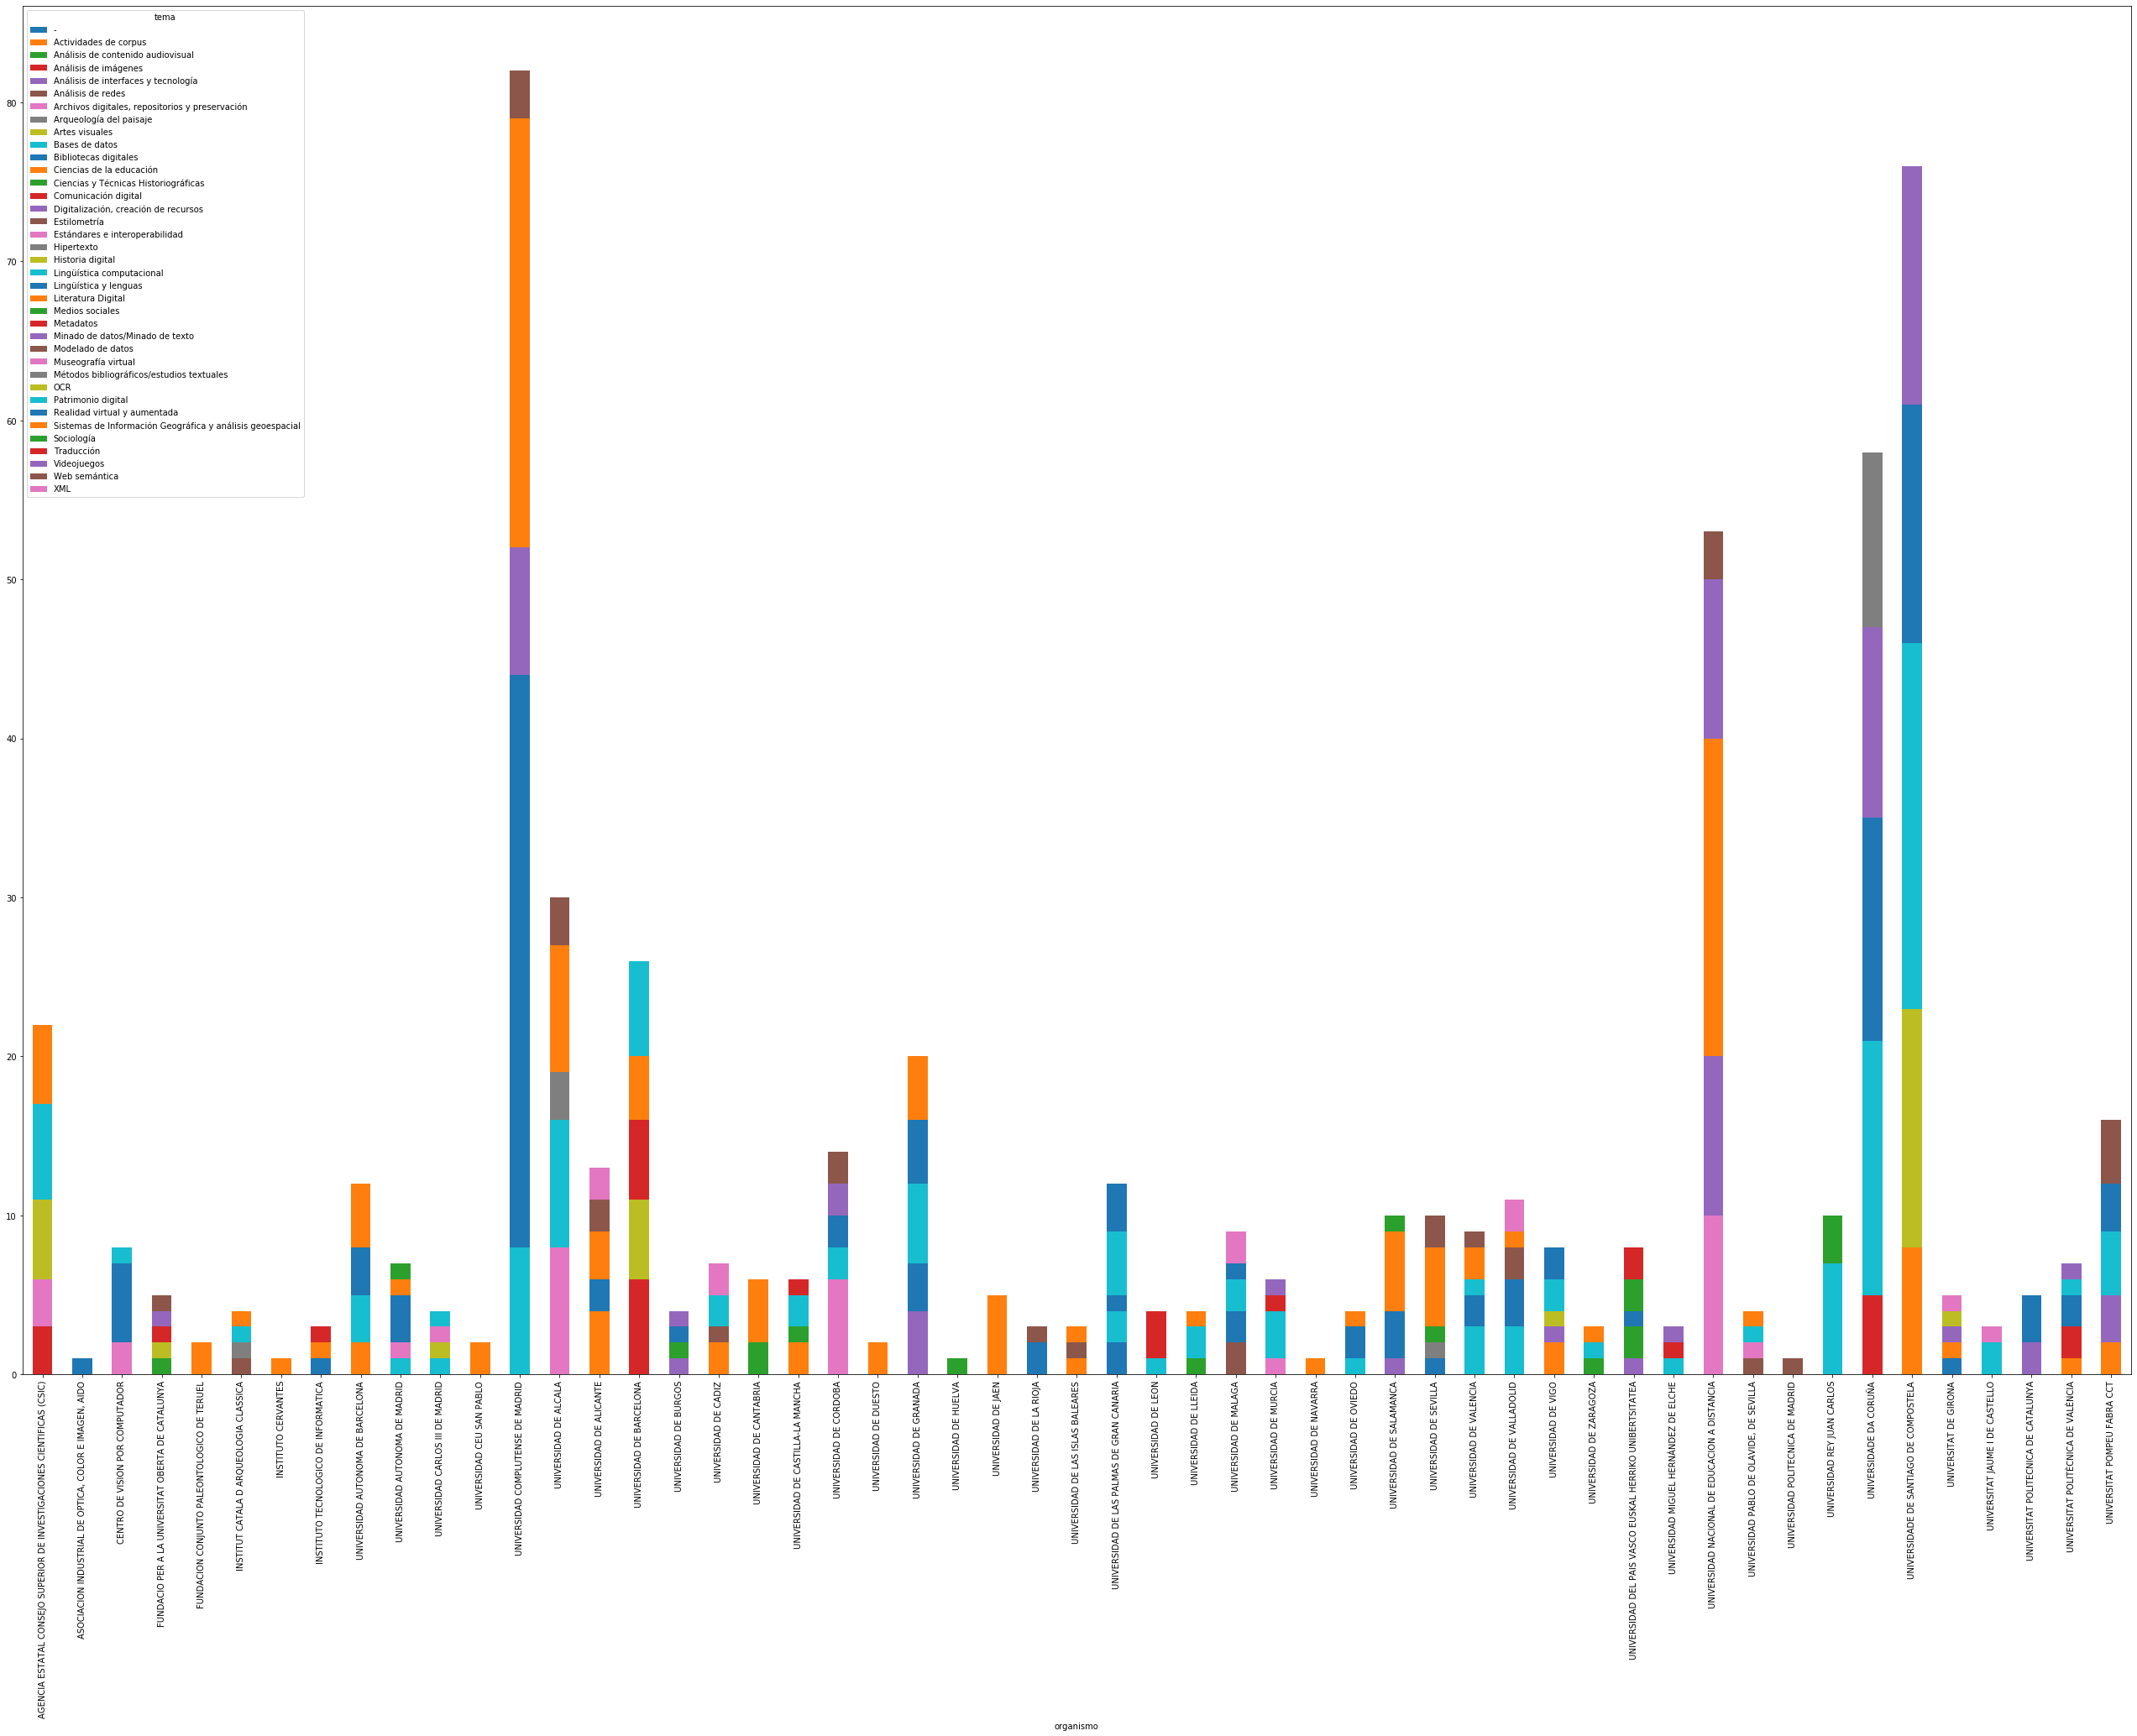

In [132]:
pivot_df.plot.bar(stacked=True, figsize=(45,30))

In [ ]:
# ALL

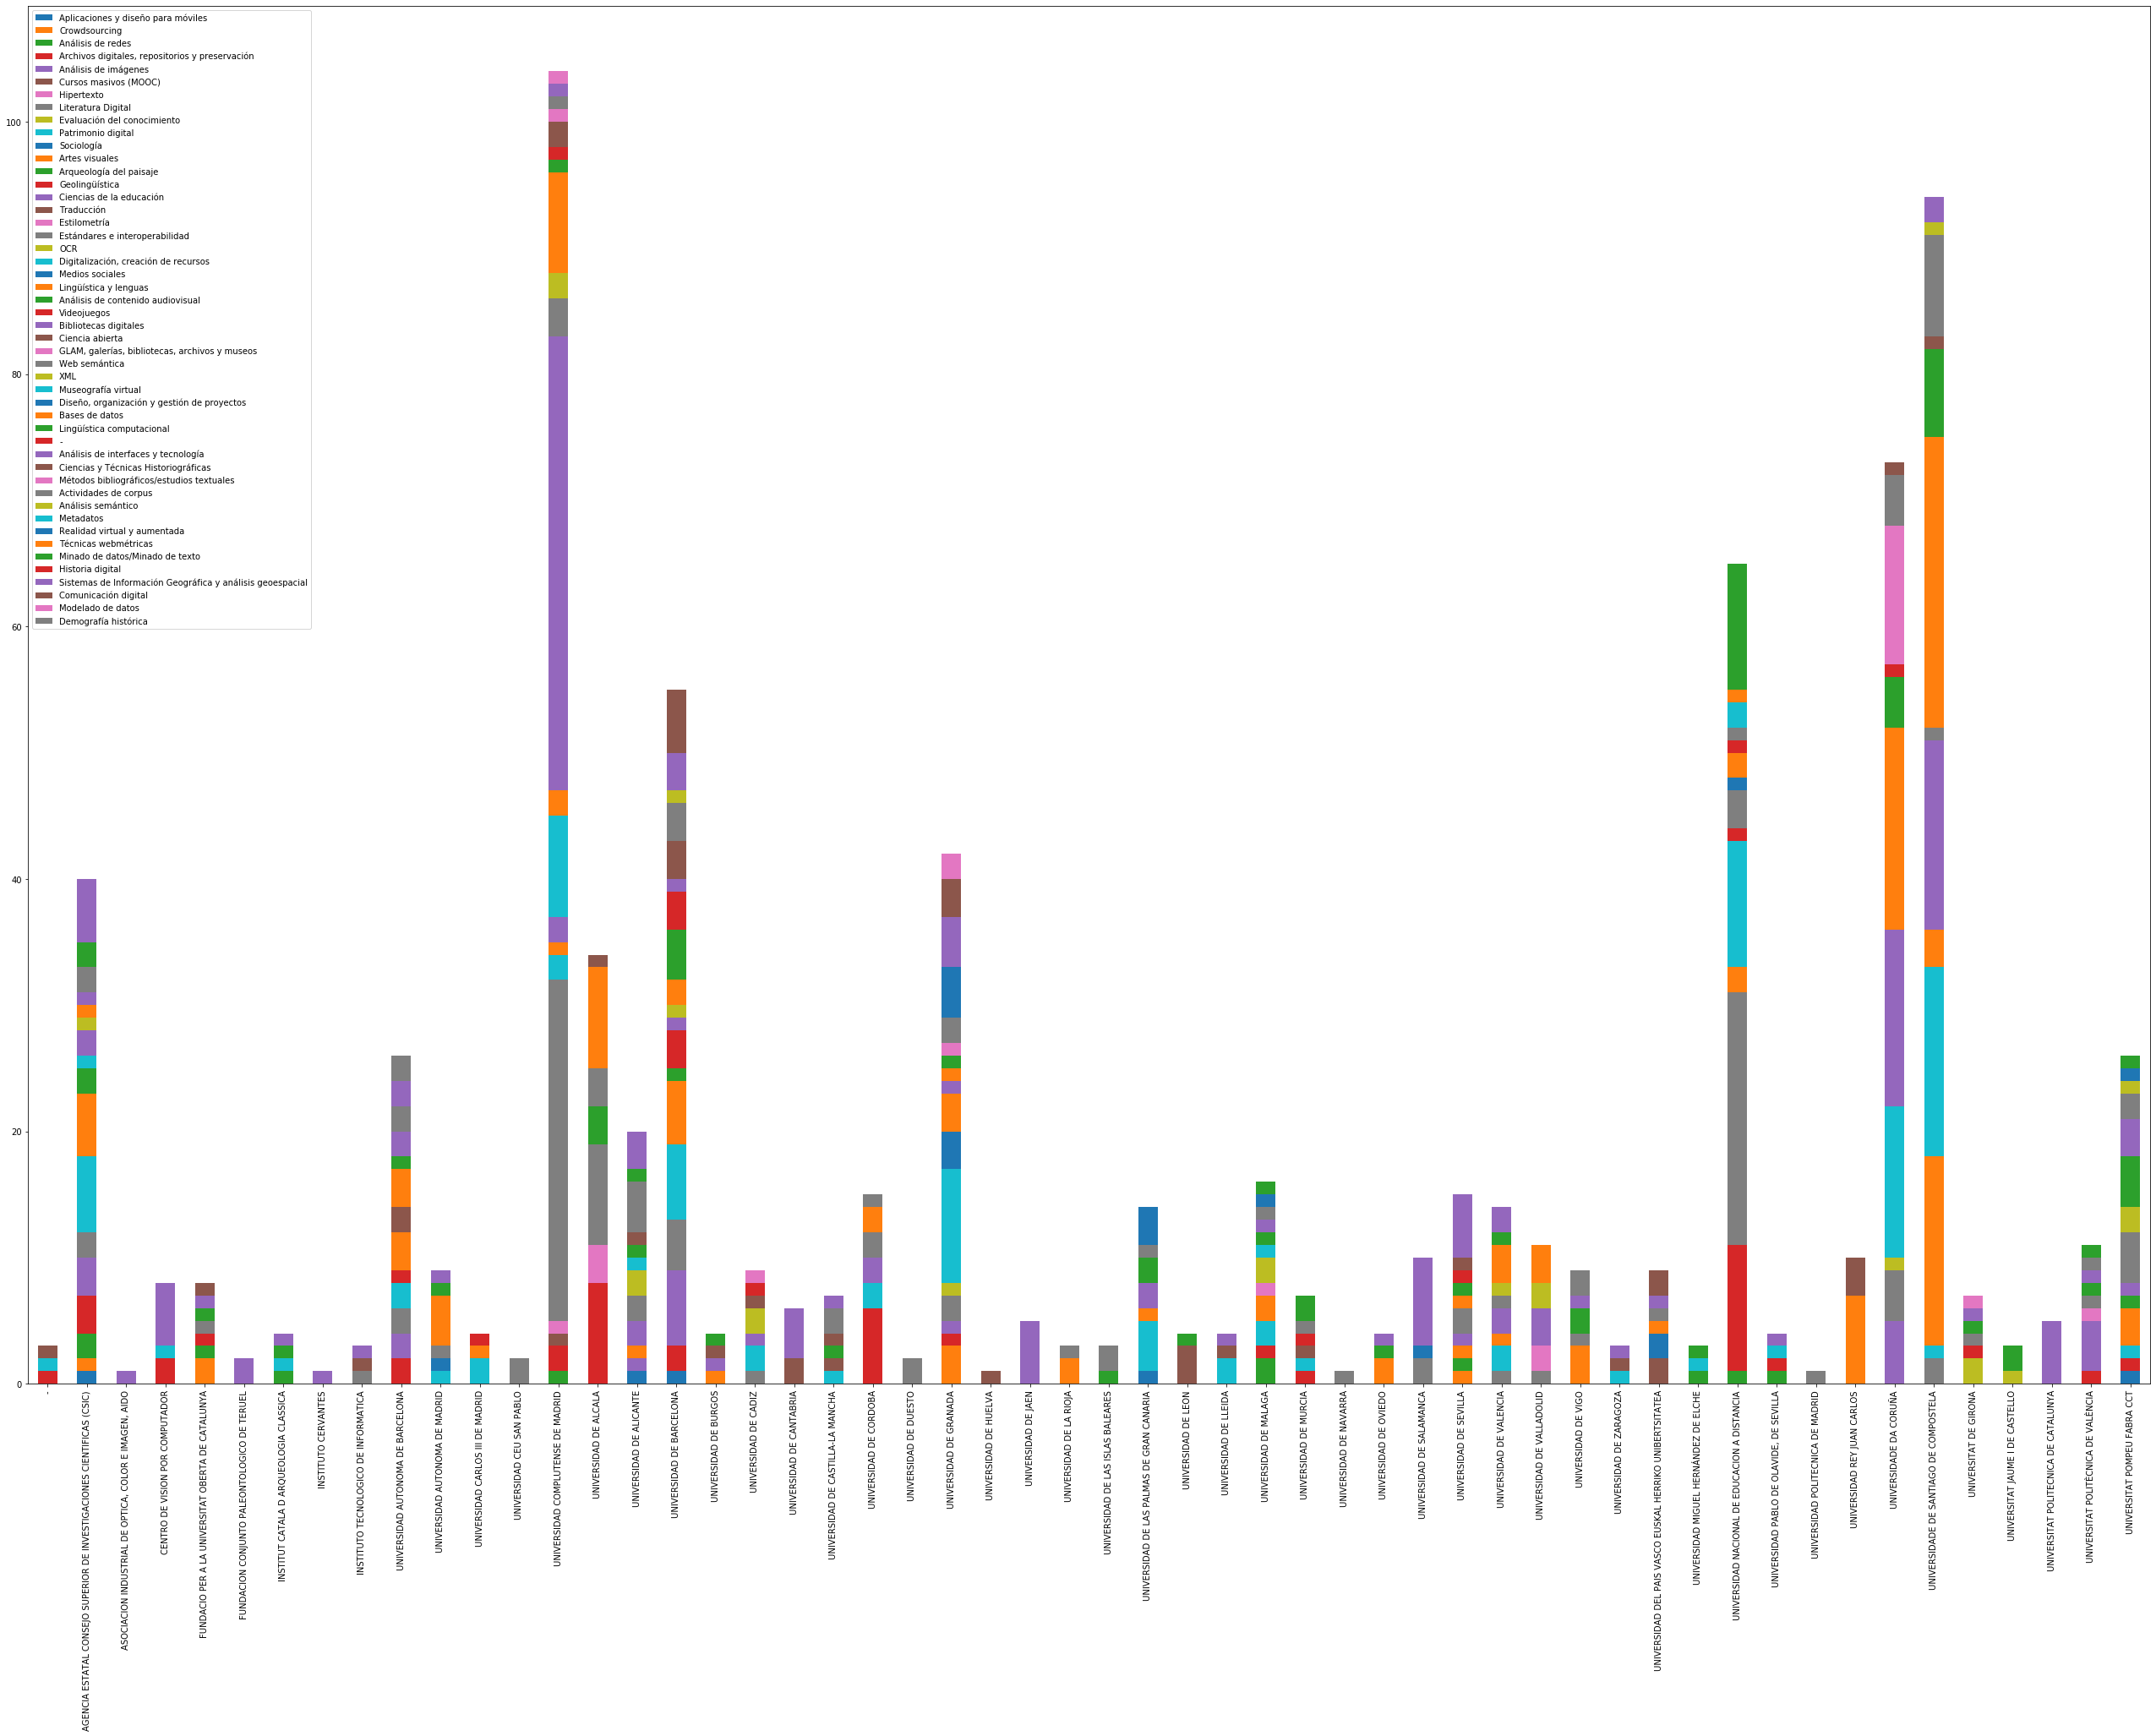

In [48]:
temas_df.plot.bar(stacked=True, figsize=(45,30))
#plt.savefig('img/organismos_temas.png', dpi=300)

In [49]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

ModuleNotFoundError: No module named 'seaborn'

In [73]:
colors = sns.color_palette("cubehelix", n_colors=len(temas_df.columns))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

In [87]:
colorcitos = ["#a14b49",
"#fc60ab",
"#744232",
"#f4200d",
"#29d6e7",
"#582f40",
"#2fe43e",
"#da1547",
"#1bd94f",
"#f7a4fa",
"#92503f",
"#78677f",
"#dfdc2b",
"#8b8352",
"#da98ed",
"#fa4920",
"#8311c0",
"#7131a7",
"#62a719",
"#388744",
"#5a0618",
"#83772d",
"#e204f8",
"#44752b",
"#b92b87",
"#02c57d",
"#52544b",
"#d57fd7",
"#faaa6f",
"#a0b84d",
"#54d47a",
"#bcc057",
"#93f52f",
"#d2e9b8",
"#8f2c0c",
"#83a43e",
"#d261c5",
"#cec4cd",
"#4054e5",
"#93bd30",
"#5b3460",
"#61c10e",
"#03bbab",
"#f58206",
"#0ca3fa",
"#02c5fa",
"#f68864",
"#6921e8",
"#4cee95",
"#dd33f3",
"#3113db",
"#8b1fec",
"#15ddef",
"#b21c0e",
"#d50ddd",
"#849f7c",
"#8c0c5a",
"#88e023",
"#2d9a80",
"#c19ac3",
"#a88393",
"#1f5886",
"#52fe38",
"#c47cc7",
"#c9a550",
]

In [93]:
col2 = colorcitos.sort()

In [96]:
colorcitos

['#02c57d',
 '#02c5fa',
 '#03bbab',
 '#0ca3fa',
 '#15ddef',
 '#1bd94f',
 '#1f5886',
 '#29d6e7',
 '#2d9a80',
 '#2fe43e',
 '#3113db',
 '#388744',
 '#4054e5',
 '#44752b',
 '#4cee95',
 '#52544b',
 '#52fe38',
 '#54d47a',
 '#582f40',
 '#5a0618',
 '#5b3460',
 '#61c10e',
 '#62a719',
 '#6921e8',
 '#7131a7',
 '#744232',
 '#78677f',
 '#8311c0',
 '#83772d',
 '#83a43e',
 '#849f7c',
 '#88e023',
 '#8b1fec',
 '#8b8352',
 '#8c0c5a',
 '#8f2c0c',
 '#92503f',
 '#93bd30',
 '#93f52f',
 '#a0b84d',
 '#a14b49',
 '#a88393',
 '#b21c0e',
 '#b92b87',
 '#bcc057',
 '#c19ac3',
 '#c47cc7',
 '#c9a550',
 '#cec4cd',
 '#d261c5',
 '#d2e9b8',
 '#d50ddd',
 '#d57fd7',
 '#da1547',
 '#da98ed',
 '#dd33f3',
 '#dfdc2b',
 '#e204f8',
 '#f4200d',
 '#f58206',
 '#f68864',
 '#f7a4fa',
 '#fa4920',
 '#faaa6f',
 '#fc60ab']

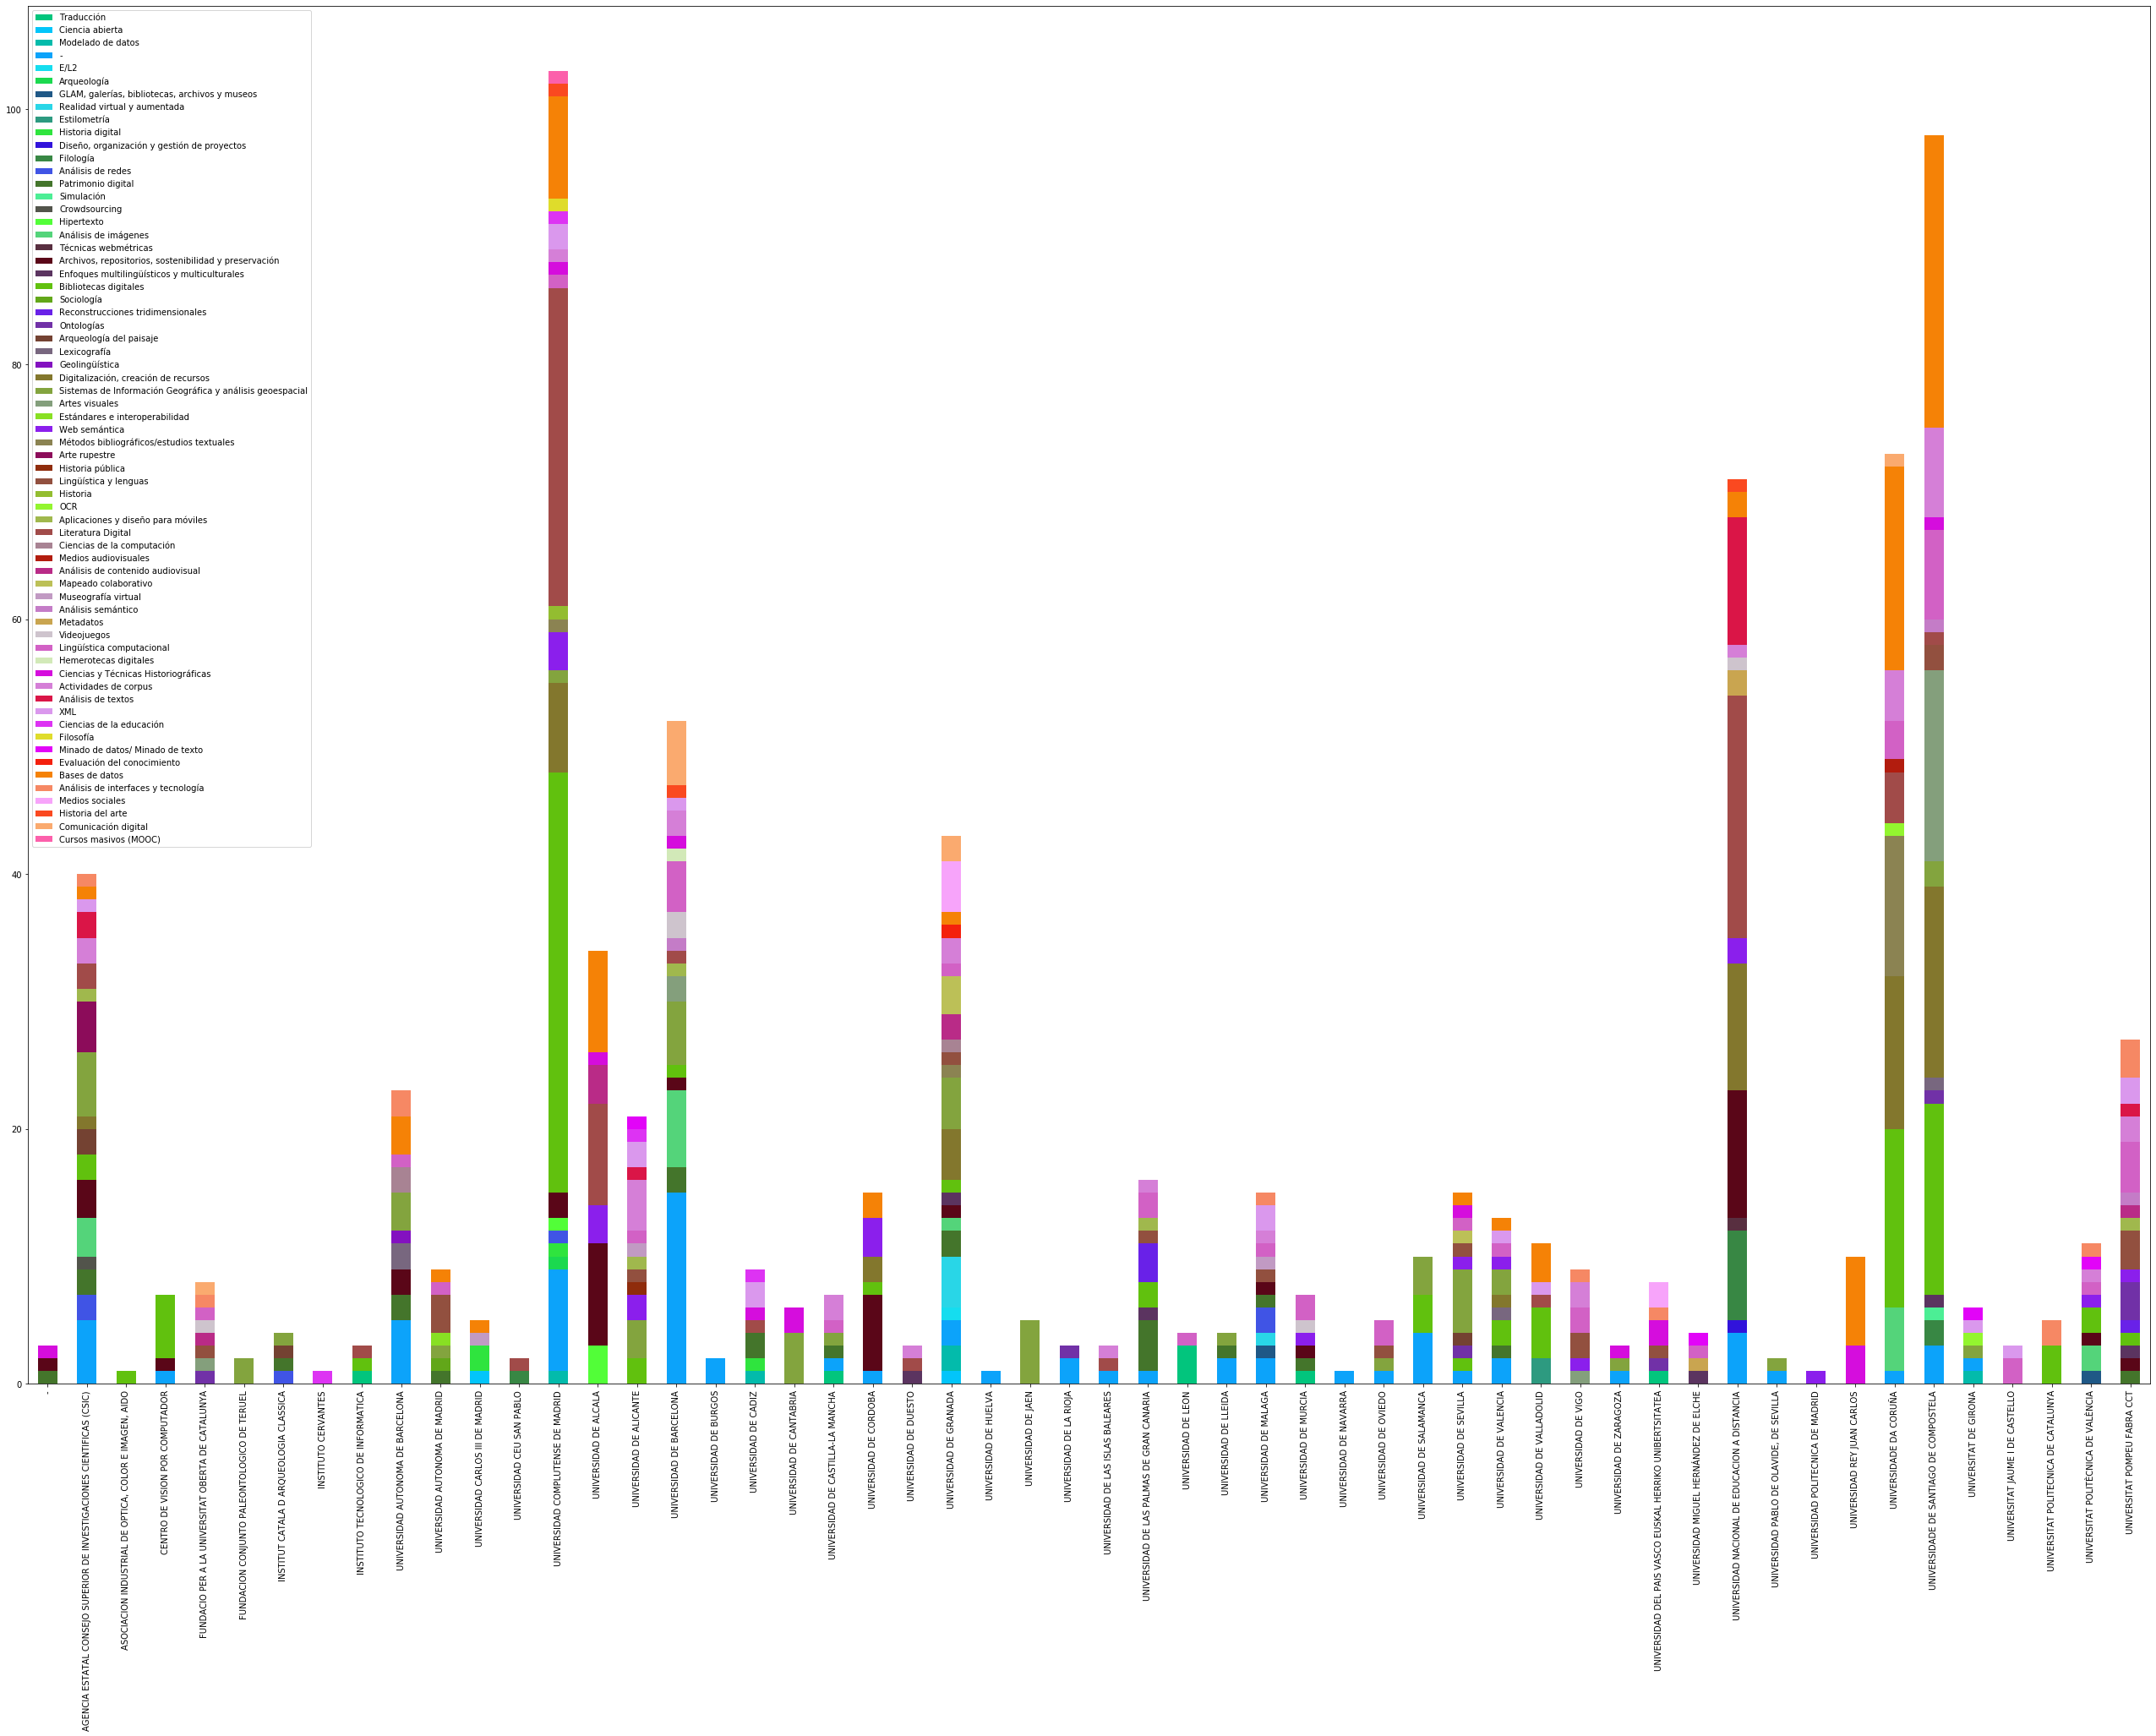

In [97]:
temas_df.plot.bar(stacked=True, figsize=(45,30), color=colorcitos)
plt.savefig('filename.png', dpi=300)